   ## Extracting and Visualizing Tesla Stock Data

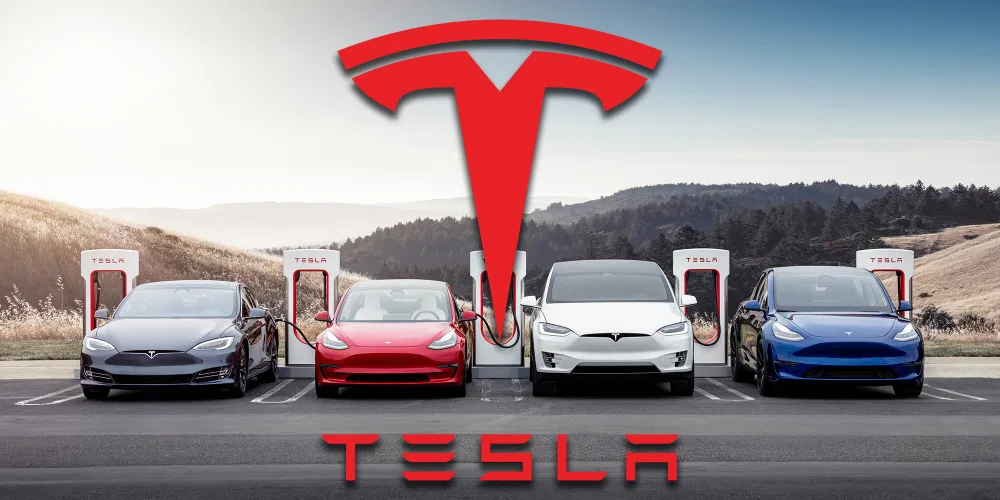

Let's import required Libs..

In [1]:
!pip install yfinance
#!pip install pandas
#!pip install requests
!pip install bs4
#!pip install plotly

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
  Created wheel for yfinance: filename=yfinance-0.1.59-py2.py3-none-any.whl size=23442 sha256=e81f2dd2c249879be602979780ab7c15327a3bb2488a1e3e29f461160eb5b2eb
  Stored in directory: /tmp/wsuser/.cache/pip/wheels/26/af/8b/fac1b47dffef567f945641cdc9b67bb25fae5725d462a8cf81
  Created wheel for multitasking: filename=multitasking-0.0.9-py3-none-any.whl size=8366 sha256=4410c873da65b4d6db61c10e8e0018771ff6601d55e2e07033e366159a7a645e
  Stored in directory: /tmp/wsuser/.cache/pip/wheels/ae/25/47/4d68431a7ec1b6c4b5233365934b74c1d4e665bf5f968d363a
Succ

In [2]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

## Define Graphing Function

In [3]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data.Date, infer_datetime_format=True), y=stock_data.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data.Date, infer_datetime_format=True), y=revenue_data.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

## Use yfinance to Extract Tesla Stock Data

In [4]:
tesla = yf.Ticker('TSLA')

In [5]:
tesla_data = tesla.history(period="max")

In [6]:

tesla_data.reset_index(inplace=True)
tesla_data.head()

Date   Open   High    Low  Close    Volume  Dividends  Stock Splits
0 2010-06-29  3.800  5.000  3.508  4.778  93831500          0           0.0
1 2010-06-30  5.158  6.084  4.660  4.766  85935500          0           0.0
2 2010-07-01  5.000  5.184  4.054  4.392  41094000          0           0.0
3 2010-07-02  4.600  4.620  3.742  3.840  25699000          0           0.0
4 2010-07-06  4.000  4.000  3.166  3.222  34334500          0           0.0

## Use Webscraping to Extract Tesla Revenue Data

Use the requests library to download the webpage https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue. Save the text of the response as a variable named html_data.

In [7]:

url = ' https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue'
r = requests.get(url)
html_data = r.text

In [8]:
soup = BeautifulSoup(html_data, 'html.parser')

In [9]:
tesla_revenue = pd.DataFrame(columns=["Date", "Revenue"])

all_data = soup.find_all('table')[1].find_all('td')
n = len(all_data)

for i in range(0, n, 2):
    # i - date and i+1 will be revenue
    date = all_data[i].text
    revenue = all_data[i+1].text
    
    tesla_revenue = tesla_revenue.append({"Date":date, "Revenue":revenue}, ignore_index = True)

tesla_revenue.head()

Date  Revenue
0  2021-03-31  $10,389
1  2020-12-31  $10,744
2  2020-09-30   $8,771
3  2020-06-30   $6,036
4  2020-03-31   $5,985

In [10]:
import numpy as np
# replace empty string by nan values.
tesla_revenue[tesla_revenue == ''] = np.nan

tesla_revenue = tesla_revenue.dropna()

Display the last 5 row of the tesla_revenue dataframe using the tail function

In [11]:
tesla_revenue.loc[:,"Revenue"] = tesla_revenue["Revenue"].str.replace('$', '')
tesla_revenue.loc[:,"Revenue"] = tesla_revenue["Revenue"].str.replace(',', '')
tesla_revenue.tail()

Date Revenue
42  2010-09-30      31
43  2010-06-30      28
44  2010-03-31      21
46  2009-09-30      46
47  2009-06-30      27

## Use yfinance to Extract Stock Data

In [12]:
gamestock = yf.Ticker('GME')

In [13]:
gme_data = gamestock.history(period = "max")

In [14]:
gme_data.reset_index(inplace = True)
gme_data.head()

Date      Open      High       Low     Close    Volume  Dividends  \
0 2002-02-13  6.480513  6.773399  6.413183  6.766666  19054000        0.0   
1 2002-02-14  6.850831  6.864296  6.682506  6.733003   2755400        0.0   
2 2002-02-15  6.733001  6.749833  6.632006  6.699336   2097400        0.0   
3 2002-02-19  6.665671  6.665671  6.312189  6.430017   1852600        0.0   
4 2002-02-20  6.463681  6.648838  6.413183  6.648838   1723200        0.0   

   Stock Splits  
0           0.0  
1           0.0  
2           0.0  
3           0.0  
4           0.0

## Use Webscraping to Extract GME Revenue Data

Use the requests library to download the webpage https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue. Save the text of the response as a variable named html_data.

In [16]:
url = 'https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue'
r = requests.get(url)
html_data = r.text

In [17]:
soup = BeautifulSoup(html_data, 'html.parser')

In [18]:
gme_revenue = pd.DataFrame(columns=["Date", "Revenue"])

all_data = soup.find_all('table')[1].find_all('td')
n = len(all_data)

for i in range(0, n, 2):
    # i - date and i+1 will be revenue
    date = all_data[i].text
    revenue = all_data[i+1].text
    
    gme_revenue = gme_revenue.append({"Date":date, "Revenue":revenue}, ignore_index = True)

gme_revenue.head()

Date Revenue
0  2021-01-31  $2,122
1  2020-10-31  $1,005
2  2020-07-31    $942
3  2020-04-30  $1,021
4  2020-01-31  $2,194

Display the last five rows of the gme_revenue dataframe using the tail function.

In [19]:
gme_revenue.loc[:,"Revenue"] = gme_revenue["Revenue"].str.replace('$', '') # removing dollar sign
gme_revenue.loc[:,"Revenue"] = gme_revenue["Revenue"].str.replace(',', '') # removing comma sign

gme_revenue.tail()

Date Revenue
60  2006-01-31    1667
61  2005-10-31     534
62  2005-07-31     416
63  2005-04-30     475
64  2005-01-31     709

## Plot Tesla Stock Graph

In [21]:
make_graph(tesla_data, tesla_revenue, 'Tesla')

## Plot GameStop Stock Graph

In [22]:
make_graph(gme_data, gme_revenue, 'GameStop')

## The End of extraction and visualization of Tesla Stock Data

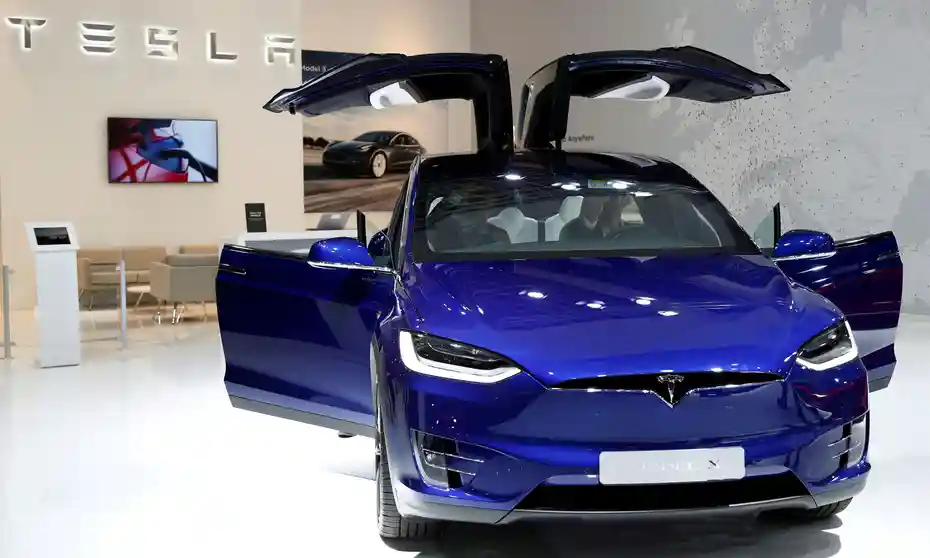